### Import dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pygsheets
%matplotlib inline


### Authorize connection between Jupyter notebook and google sheets 

In [2]:
gc = pygsheets.authorize() 
# Use customized credentials 
gc = pygsheets.authorize(client_secret='client_secret.json')
# For the first time, it will may produce as a link to authorize

### Open spreadsheet by name

In [3]:
sh = gc.open('PythonCurrentFlow_Aging')

### Open "Data" worksheet (can also use sh.sheet1)

In [4]:
data = sh[0]

### Get worksheet values as pandas dataframe

In [5]:
aging_data = pd.DataFrame(data.get_all_records())

In [6]:
aging_data.head()

,Genus,Species,Sample ID,Species Code,Site,River,Basin,Lat,Long,Date Collected,...,Status Upon Collection,Final Age,Age dif,Z age,L age,B age,K&M Age,K age,M age,Notes
0,Amblema,plicata,1,D,"Gonzales, TX",Guadalupe,Guadalupe,29.493646°,-97.431293°,9/24/19,...,Alive,15,,,,,15,15,14,
1,Amblema,plicata,2,D,"Gonzales, TX",Guadalupe,Guadalupe,29.493646°,-97.431293°,9/24/19,...,Alive,16,,,,,16,16,12,
2,Amblema,plicata,3,D,"Gonzales, TX",Guadalupe,Guadalupe,29.493646°,-97.431293°,9/24/19,...,Alive,17,,,,,17,17,9,
3,Amblema,plicata,4,D,"Gonzales, TX",Guadalupe,Guadalupe,29.493646°,-97.431293°,9/24/19,...,Alive,15,,,,,15,13,12,
4,Amblema,plicata,5,D,"Gonzales, TX",Guadalupe,Guadalupe,29.493646°,-97.431293°,9/24/19,...,Alive,14,,,,,14,14,12,


### Clean data

#### Rename columns 

In [7]:
df_rename=aging_data.rename(columns={"Sample ID": "id", "Genus":"genus", "Species":"species", "Species Code": "code", "Site":"site", "River":"river", "Basin":"basin", "Lat":"lat", "Long":"long", "Date Collected":"date", "Status Upon Collection":"status", "Ager":"ager", "Age":"age"})


#### Drop some columns

In [8]:
drop_df=df_rename.drop(columns=['Final Age', 'Age dif', 'K&M Age', 'K age', 'M age', 'Notes'])
drop_df.head()

,genus,species,id,code,site,river,basin,lat,long,date,Length (mm),status,Z age,L age,B age
0,Amblema,plicata,1,D,"Gonzales, TX",Guadalupe,Guadalupe,29.493646°,-97.431293°,9/24/19,74.0,Alive,,,
1,Amblema,plicata,2,D,"Gonzales, TX",Guadalupe,Guadalupe,29.493646°,-97.431293°,9/24/19,72.0,Alive,,,
2,Amblema,plicata,3,D,"Gonzales, TX",Guadalupe,Guadalupe,29.493646°,-97.431293°,9/24/19,76.0,Alive,,,
3,Amblema,plicata,4,D,"Gonzales, TX",Guadalupe,Guadalupe,29.493646°,-97.431293°,9/24/19,76.0,Alive,,,
4,Amblema,plicata,5,D,"Gonzales, TX",Guadalupe,Guadalupe,29.493646°,-97.431293°,9/24/19,77.0,Alive,,,


#### Select teres data (b/c X, L and B have aged)

In [9]:
teres_df = drop_df.loc[drop_df["species"] == "teres"]

#### Drop NaNs

In [10]:
nan_value=float("NaN")
teres_df.replace("", nan_value, inplace=True)
clean_teres=teres_df.dropna()


/Users/biancahernandez/opt/anaconda2/envs/mussel_aging/lib/python3.8/site-packages/pandas/core/frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [11]:
clean_teres.head()

,genus,species,id,code,site,river,basin,lat,long,date,Length (mm),status,Z age,L age,B age
334,Lampsilis,teres,336,E,"Bay City, TX",Colorado,Colorado,29.126034°,-96.044864°,5/5/20,139.0,Alive,5.0,5.0,5
335,Lampsilis,teres,337,E,"Bay City, TX",Colorado,Colorado,29.126034°,-96.044864°,5/5/20,121.0,Alive,6.0,11.0,6
337,Lampsilis,teres,339,E,"Bay City, TX",Colorado,Colorado,29.126034°,-96.044864°,5/5/20,107.0,Alive,4.0,5.0,4
339,Lampsilis,teres,341,E,"Bay City, TX",Colorado,Colorado,29.126034°,-96.044864°,5/5/20,114.0,Alive,4.0,4.0,5
340,Lampsilis,teres,342,E,"Bay City, TX",Colorado,Colorado,29.126034°,-96.044864°,5/5/20,74.0,Alive,1.0,2.0,2


#### Check datatypes 

In [12]:
clean_teres.dtypes

genus           object
species         object
id               int64
code            object
site            object
river           object
basin           object
lat             object
long            object
date            object
Length (mm)    float64
status          object
Z age          float64
L age          float64
B age           object
dtype: object

#### Run cell when opened (will transform datatype from object to float64)

In [13]:
clean_teres.drop(index=[435, 442], inplace=True)
clean_teres['B age'] = pd.to_numeric(clean_teres['B age'])
print (clean_teres.dtypes)

genus           object
species         object
id               int64
code            object
site            object
river           object
basin           object
lat             object
long            object
date            object
Length (mm)    float64
status          object
Z age          float64
L age          float64
B age            int64
dtype: object


/Users/biancahernandez/opt/anaconda2/envs/mussel_aging/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-13-8ab3447ee530>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_teres['B age'] = pd.to_numeric(clean_teres['B age'])


#### Get description of data

In [14]:
clean_teres.describe()

,id,Length (mm),Z age,L age,B age
count,123.000000,123.000000,123.000000,123.000000,123.000000
mean,405.439024,100.804878,4.069106,4.768293,4.235772
std,40.130350,25.732278,2.076730,2.076698,1.890794
min,336.000000,19.000000,0.500000,0.500000,1.000000
25%,371.500000,85.500000,3.000000,3.000000,3.000000
50%,406.000000,105.000000,4.000000,5.000000,4.000000
75%,437.000000,117.500000,5.000000,6.000000,5.000000
max,475.000000,142.000000,9.000000,11.000000,9.000000


### Pairwise comparison between agers (*L. teres*)
#### Rename agers

In [15]:
rename=clean_teres.rename(columns={'Z age':'Z', 'L age':'L', 'B age':'B'})
rename.head()

,genus,species,id,code,site,river,basin,lat,long,date,Length (mm),status,Z,L,B
334,Lampsilis,teres,336,E,"Bay City, TX",Colorado,Colorado,29.126034°,-96.044864°,5/5/20,139.0,Alive,5.0,5.0,5
335,Lampsilis,teres,337,E,"Bay City, TX",Colorado,Colorado,29.126034°,-96.044864°,5/5/20,121.0,Alive,6.0,11.0,6
337,Lampsilis,teres,339,E,"Bay City, TX",Colorado,Colorado,29.126034°,-96.044864°,5/5/20,107.0,Alive,4.0,5.0,4
339,Lampsilis,teres,341,E,"Bay City, TX",Colorado,Colorado,29.126034°,-96.044864°,5/5/20,114.0,Alive,4.0,4.0,5
340,Lampsilis,teres,342,E,"Bay City, TX",Colorado,Colorado,29.126034°,-96.044864°,5/5/20,74.0,Alive,1.0,2.0,2


In [16]:
# rename.dtypes

#### Reshape dataframe so it's suitable for statsmodels package (pivot agers vertically)

In [17]:
rename_melt = pd.melt(rename.reset_index(), id_vars=['index'], value_vars=['Z', 'L', 'B'])

#### Generate a boxplot to see the data distribution by agers. 

/Users/biancahernandez/opt/anaconda2/envs/mussel_aging/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 13.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/biancahernandez/opt/anaconda2/envs/mussel_aging/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 17.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


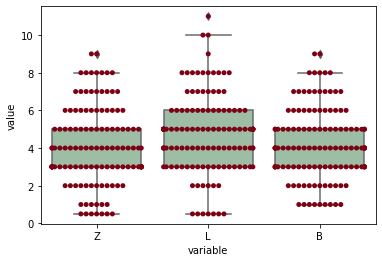

In [18]:

import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='variable', y='value', data=rename_melt, color='#99c2a2')
ax = sns.swarmplot(x="variable", y="value", data=rename_melt, color='#7d0013')
plt.show()

In [19]:
import plotly.express as px

In [20]:
rename_melt.head()

,index,variable,value
0,334,Z,5.0
1,335,Z,6.0
2,337,Z,4.0
3,339,Z,4.0
4,340,Z,1.0


In [25]:
rename_melt.to_csv('agers_melt.csv', encoding='utf-8', index=False)

In [24]:
fig = px.box(rename_melt, x="variable", y="value", color="variable",
             boxmode="overlay", points='all')

fig.show()

#### Import dependencies

In [146]:
import scipy.stats as stats

#### Stats f_oneway functions takes the groups as input and returns ANOVA F and p value

In [147]:
fvalue, pvalue = stats.f_oneway(rename['Z'], rename['L'], rename['B'])
print(fvalue, pvalue)
#4.033692553063654 0.01850193789744621

4.033692553063654 0.01850193789744621


#### Get ANOVA table as R like output

In [148]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Ordinary Least Squares (OLS) model

In [149]:
model = ols('value ~ C(variable)', data=rename_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(variable),32.808943,2.0,4.033693,0.018502
Residual,1488.471545,366.0,NaN,NaN


#### Import dependencies for Tukey HSD

In [65]:
from bioinfokit.analys import stat

#### ANOVA w/ mean_sq

In [67]:
res = stat()
res.anova_stat(df=rename_melt, res_var='value', anova_model='value ~ C(variable)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(variable),2.0,32.721355,16.360678,4.060619,0.018012
Residual,370.0,1490.770602,4.029110,NaN,NaN


#### Multiple pairwise comparison (Tukey's HSD)

In [68]:
#  FOR unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=rename_melt, res_var='value', xfac_var='variable', anova_model='value ~ C(variable)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Z,L,0.696000,0.098497,1.293503,3.876678,0.017599
1,Z,B,0.175772,-0.424154,0.775699,0.975086,0.749648
2,L,B,0.520228,-0.079699,1.120154,2.885929,0.104078


### Test assumptions

#### 1) QQ-plot

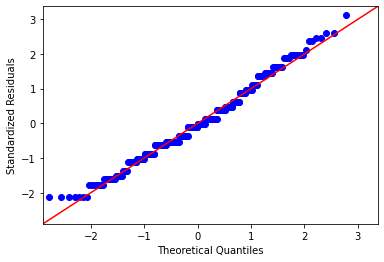

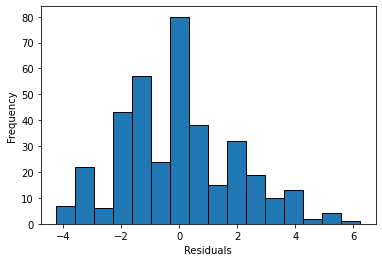

In [69]:
# QQ-plot to detect outliers
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

#### 2) Use Shapiro-Wilk test to check normal distribution of residuals 
#### Null hypothesis: data is drawn from normal distribution.

In [156]:
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.9848870635032654 0.0006670355796813965


#### 3) Bartlett’s test to check the Homogeneity of variances.
#### Null hypothesis: samples from populations have equal variances.

In [157]:
res = stat()
res.bartlett(df=rename_melt, res_var='value', xfac_var='variable')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),1.3947
1,Degrees of freedom (Df),2.0000
2,p value,0.4979


#### P value is not significant, fail to reject null hypothesis and conclude that agers have equal variances.

### Interactive figures

In [150]:
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff

#### Histogram agers 

In [120]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=clean_teres["Z age"], name='Z'))
fig.add_trace(go.Histogram(x=clean_teres["L age"], name='L'))
fig.add_trace(go.Histogram(x=clean_teres["B age"], name='B'))


# Overlay both histograms
fig.update_layout(
    
    title=dict(
        text='L. teres age counts (Z, L & B)',
        x=0.5,
        y=0.95,
        xanchor='center',
        yanchor= 'top',
        font=dict(
            size=16,
            color='#000000'
                )),
    barmode='group',
    bargap=0,
    template='simple_white',
#     paper_bgcolor='#FFFFFF',
#     plot_bgcolor='#FFFFFF',
    width=900, 
    height=500,
    bargroupgap=0
    )
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.update_xaxes(
        showgrid=False, 
        zeroline=False,
        title_text = "age"
        )
fig.update_yaxes(
        showgrid=False, 
        zeroline=False,
        title_text = "count",
        )

fig.show()